<a href="https://colab.research.google.com/github/Abhishek616/Customer-Satisfaction-Case-Study/blob/main/Customer_Satisfaction_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

redig the dataset

In [ ]:
import pandas as pd

data = pd.read_csv('/content/E-commerce_NPA_Dataset.csv')

data.head()

,CustomerID,Age,Gender,PurchaseAmount,PurchaseFrequency,ProductQualityRating,DeliveryTimeRating,CustomerServiceRating,WebsiteEaseOfUseRating,ReturnRate,DiscountUsage,LoyaltyProgramMember
0,1,38,Female,749.097626,24,2,1,3,5,0.12,135.392573,No
1,2,30,Male,735.224916,18,5,4,4,5,0.37,193.450663,Yes
2,3,55,Male,1145.520305,22,3,5,4,1,0.10,147.246263,Yes
3,4,39,Female,925.460535,14,4,3,2,4,0.38,56.362894,Yes
4,5,51,Male,108.359916,9,3,3,2,5,0.42,338.731055,No


summarizing the data

In [ ]:
data.describe()

,CustomerID,Age,PurchaseAmount,PurchaseFrequency,ProductQualityRating,DeliveryTimeRating,CustomerServiceRating,WebsiteEaseOfUseRating,ReturnRate,DiscountUsage
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.0000,500.000000,500.000000,500.000000
mean,250.500000,44.170000,1065.050731,14.308000,2.93400,3.008000,3.0780,3.082000,0.252280,251.181010
std,144.481833,14.813777,583.199658,8.151197,1.41054,1.372481,1.4156,1.415374,0.149674,141.531993
min,1.000000,18.000000,51.799790,1.000000,1.00000,1.000000,1.0000,1.000000,0.000000,0.772696
25%,125.750000,32.000000,535.083407,7.000000,2.00000,2.000000,2.0000,2.000000,0.110000,133.672231
50%,250.500000,44.000000,1100.884065,14.000000,3.00000,3.000000,3.0000,3.000000,0.260000,251.940355
75%,375.250000,58.000000,1584.348124,22.000000,4.00000,4.000000,4.0000,4.000000,0.380000,371.692341
max,500.000000,69.000000,1999.655968,29.000000,5.00000,5.000000,5.0000,5.000000,0.500000,499.813315


key observations from this summary

1. average customer age is around **44** years and ranges from **18** to **69** years.
2. average purchase amount is around **1065 dollars** with significant standard deviation indicating a variability in spending.
3. customers purchase on average of **14** times with some making upto **29** purchases.
4. average ratings for product quality, delivery time, customer service, website ease of use are around **3** which indicate moderate rating and ranges from **1 (poor)** to **5 (excellent)**.
5. the average return rate is around **25 percent** with some customers having a higher return rate of **50 percent**.
6. the average discount usage is around **251 dollars** with high standard deviation indicating high variability.

visualising the distribution of data

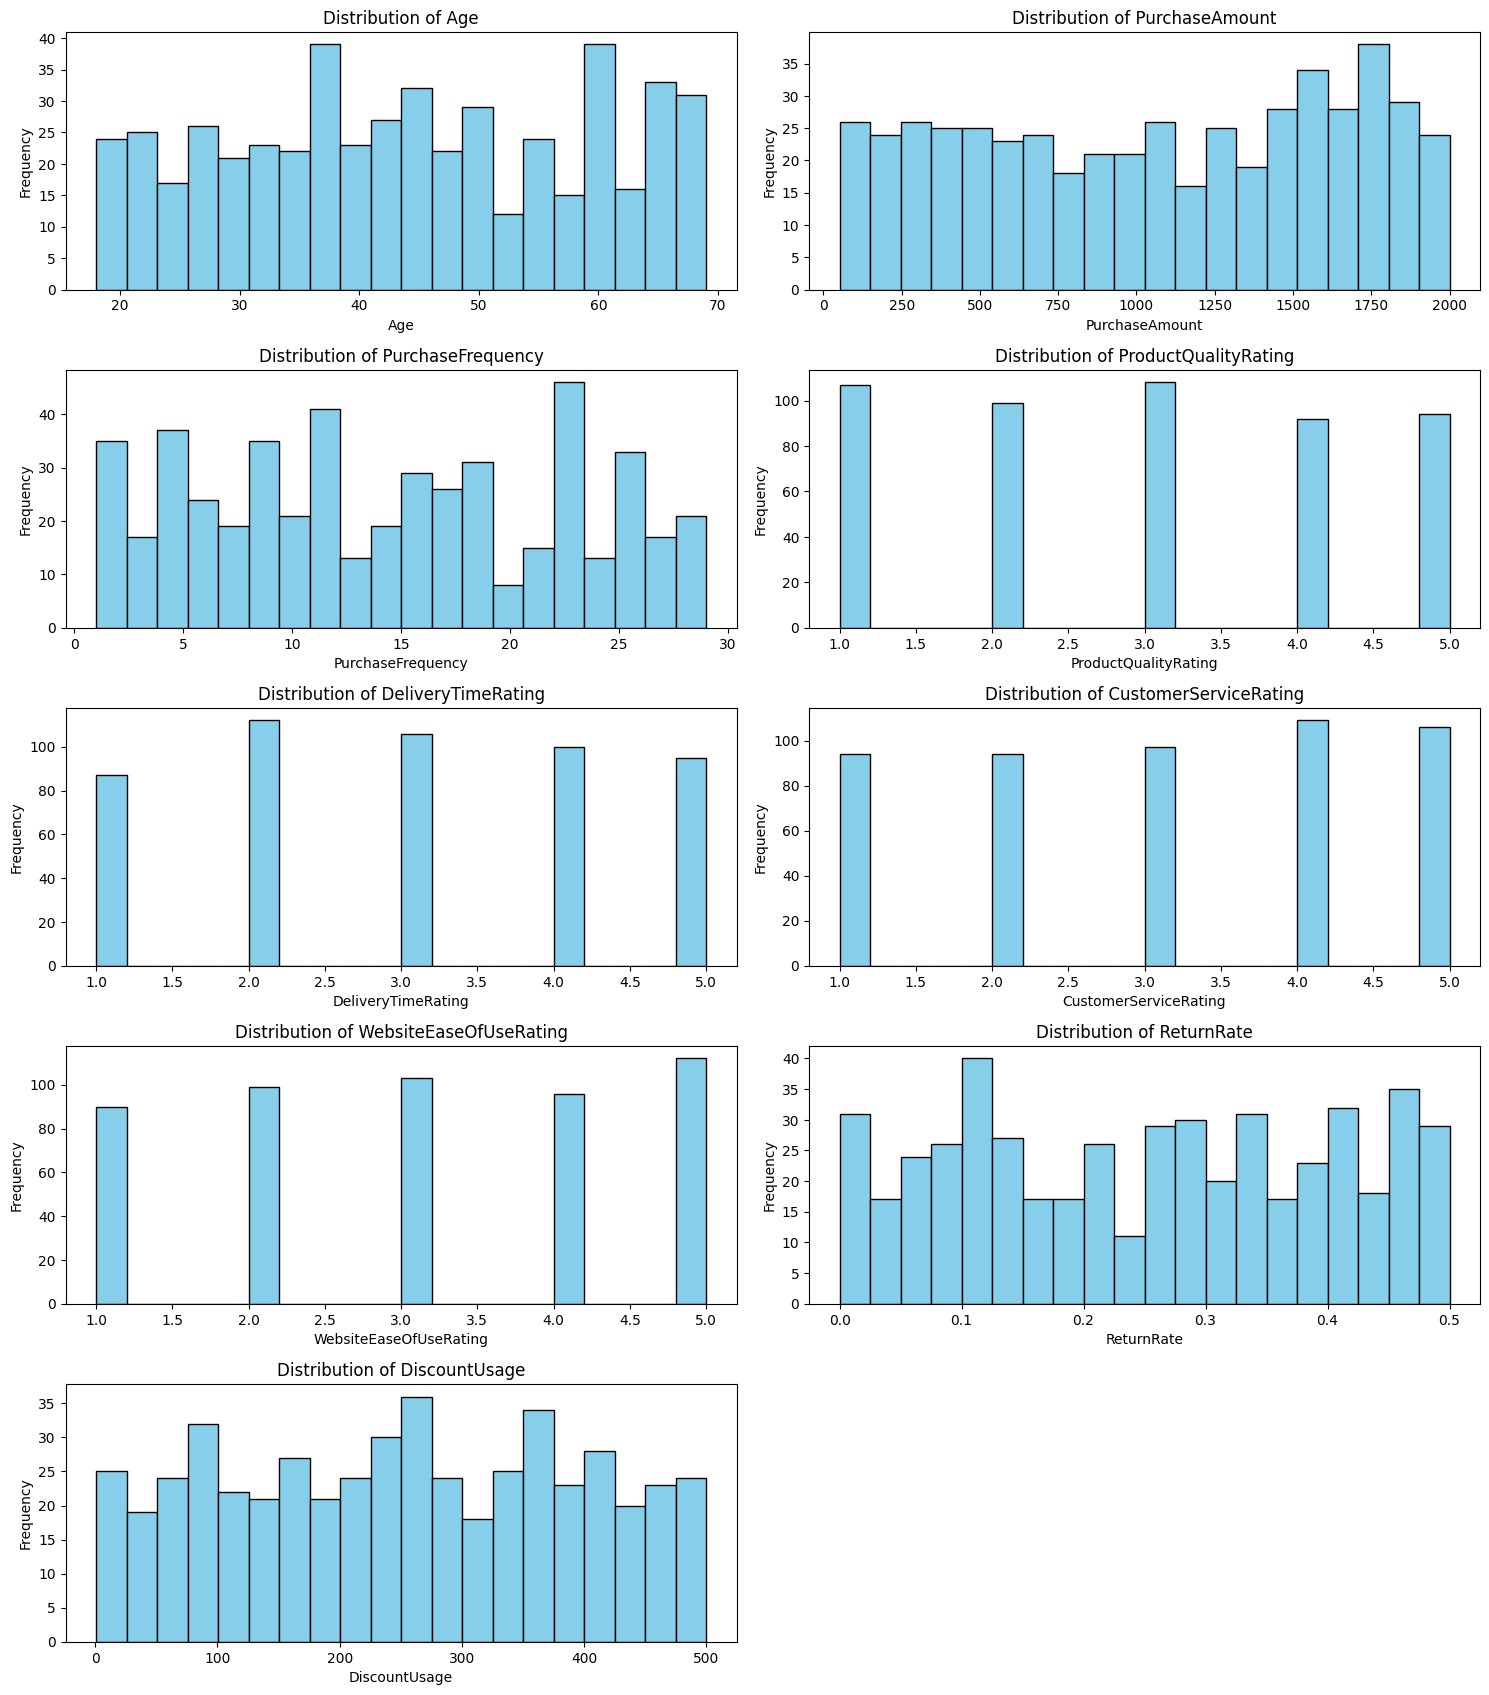

In [ ]:
import matplotlib.pyplot as plt

numeric_columns = ['Age', 'PurchaseAmount', 'PurchaseFrequency', 'ProductQualityRating',
                   'DeliveryTimeRating', 'CustomerServiceRating', 'WebsiteEaseOfUseRating',
                   'ReturnRate', 'DiscountUsage']

plt.figure(figsize=(15, 20))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(6, 2, i)
    plt.hist(data[column], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

The following insights are obtained from these histograms for customer demographics and satisfaction metrics:
1. the age distribution is relatively even with peaks **near 40** and **at 60**.
2. purchase amount distribution is left-skewed, indicating most customers spend **less than 1000 dollars**.
3. purchase frequency is varied with notable peaks around **10** and **20** purchases.
4. the different ratings are ditributed wide with peaks clustering around the middle values.
5. return rates are varied with peaks **near 0.1** and **near 0.5**.
6. discount usage is evenly spread with multiple peaks indicating no significant trend.

These findings suggest that the customers behaviours are diverse with varying levels of stisfacton to different service aspects.

segmenting the customers based on demographic and behavioural factors
demographic factors : age, gender
behavioral factors : loyalty program membership

segments willme made based on these factors and will be used to analyse the ratings of diffrent service aspects.

In [ ]:
# creating age groups
bins = [18, 30, 40, 50, 60, 70]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# selecting only ratin columns for calculation
rating_columns = ['ProductQualityRating', 'DeliveryTimeRating', 'CustomerServiceRating', 'WebsiteEaseOfUseRating']

# calculating mean ratings by age group and gender
age_gender_ratings = data.groupby(['AgeGroup', 'Gender'])[rating_columns].mean()

# printing the results
age_gender_ratings.reset_index(inplace=True)
age_gender_ratings

<ipython-input-8-ade0f289a53f>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_ratings = data.groupby(['AgeGroup', 'Gender'])[rating_columns].mean()


,AgeGroup,Gender,ProductQualityRating,DeliveryTimeRating,CustomerServiceRating,WebsiteEaseOfUseRating
0,18-29,Female,3.052632,3.210526,3.175439,2.912281
1,18-29,Male,2.933333,3.000000,3.333333,3.355556
2,30-39,Female,2.929825,2.859649,2.912281,3.070175
3,30-39,Male,3.080000,2.820000,2.980000,2.880000
4,40-49,Female,3.090909,2.890909,3.036364,3.109091
5,40-49,Male,2.857143,3.166667,3.142857,3.142857
6,50-59,Female,2.945946,2.945946,3.027027,3.162162
7,50-59,Male,2.833333,2.895833,3.312500,3.062500
8,60-69,Female,2.900000,3.300000,3.066667,2.950000
9,60-69,Male,2.673469,2.938776,2.836735,3.285714


Insights from this data:
1. young customers (18-29) generally rate product quality higher.
2. females from 40-49 age group give the highest ratngs while males from 60-69 age group give the lowest rating.
3. delivery time satisfaction is relatively consistent with minor variations.
4. highest rating for delivery time stisfaction is from females (60-69)
and lowest from males (30-39).
5. customer service rating is fairly consistent with a peak from males (18-29).
6. males (60-69) rate custome service lowest.

analysing impact of loyalty plan menbership on customer satisfaction

In [ ]:
# selecting rating columns
rating_columns = ['ProductQualityRating', 'DeliveryTimeRating', 'CustomerServiceRating',
                  'WebsiteEaseOfUseRating', 'ReturnRate', 'DiscountUsage']

# calculating mean ratings by loyalty program membership
loyalty_ratings = data.groupby('LoyaltyProgramMember')[rating_columns].mean()

# printing the results
loyalty_ratings.reset_index(inplace=True)
loyalty_ratings

,LoyaltyProgramMember,ProductQualityRating,DeliveryTimeRating,CustomerServiceRating,WebsiteEaseOfUseRating,ReturnRate,DiscountUsage
0,No,2.920502,2.916318,2.987448,3.108787,0.251883,241.426710
1,Yes,2.946360,3.091954,3.160920,3.057471,0.252644,260.113108


from this data we get the following insights:
1. loyalty program members rate product quality slightly higher than non-members.
2. loyalty program members are more satisfied in delivery time than non-members.
3. non-members are less satisfied by customer service than members.
4. non-members are silghtly more satisfied by website ease of use than members.
5. return rates are almost identical for both parties.
6. loyalty members have higher discount usage.

calculation of net promoter score

net promoter score is a metric used to gauge the customer loyalty and satisfaction by asking customers how likely they are to recommend a product or service on a scale of 1 to 10. respondents are classified into three categories:
1. promoters (9-10)
2. passives (7-8)
3. detractors (1-6)

NPS score is calculated by subtracting percentage of detractors from percentage of promoters. higher NPS indictes more customer loyalty and positive word-of-mouth, critical for business growth.

using customer service rating as a proxy for overall satisfaction we can calculate NPS score

In [ ]:
# define NPS categories based on customer service rating
data['NPS_Category'] = pd.cut(data['CustomerServiceRating'], bins=[0, 6, 8, 10], labels=['Detractors', 'Passives', 'Promoters'], right=False)

# calculate NPS
nps_counts = data['NPS_Category'].value_counts(normalize=True) * 100
detractors = nps_counts['Detractors']
promoters = nps_counts['Promoters']
passives = nps_counts['Passives']
nps_score = promoters - detractors

# print the results
print('NPS Score:', nps_score)
print('')
print('NPS Categories:')
print(nps_counts)

NPS Score: -100.0

NPS Categories:
NPS_Category
Detractors    100.0
Passives        0.0
Promoters       0.0
Name: proportion, dtype: float64


this data shows us that 100% of the customers fall into the detractors category which indicates significant changes must be done in customer service to turn detactors into promoters

root cause analysis for low satisfaction

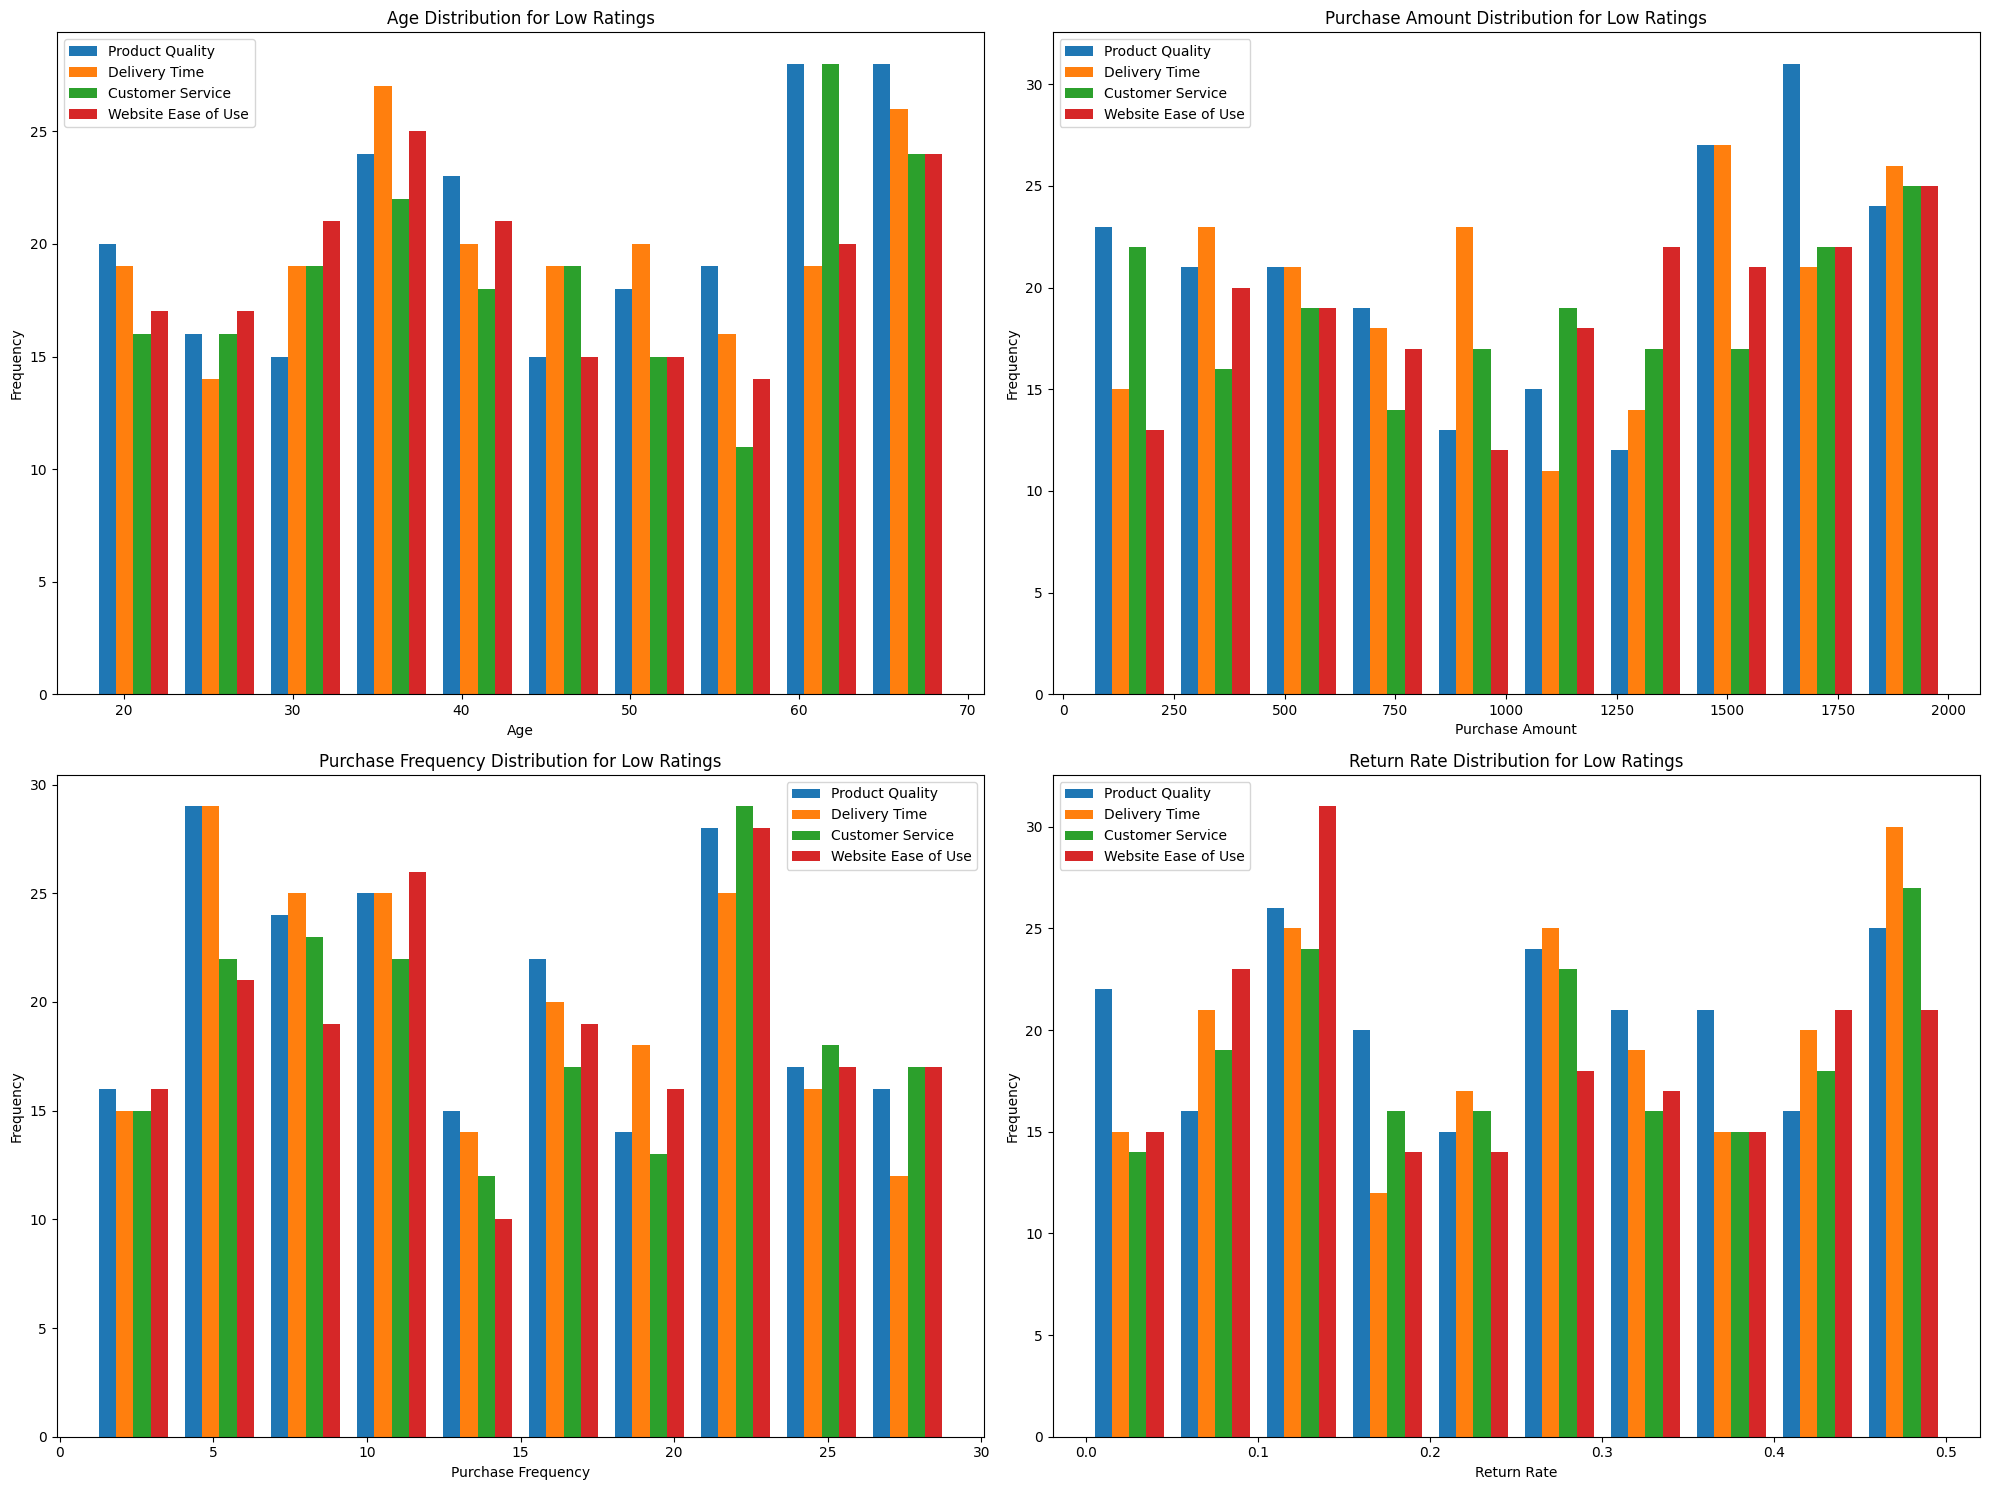

In [ ]:
# define low rating threshold
low_rating_threshold = 2

# create subsets for low ratings in different aspects
low_product_quality = data[data['ProductQualityRating'] <= low_rating_threshold]
low_delivery_time = data[data['DeliveryTimeRating'] <= low_rating_threshold]
low_customer_service = data[data['CustomerServiceRating'] <= low_rating_threshold]
low_website_ease_of_use = data[data['WebsiteEaseOfUseRating'] <= low_rating_threshold]

# plot the characteristics for each low rating subset
plt.figure(figsize=(20, 15))

# age distribution for low ratings
plt.subplot(2, 2, 1)
plt.hist([low_product_quality['Age'], low_delivery_time['Age'], low_customer_service['Age'], low_website_ease_of_use['Age']], bins=10, label=['Product Quality', 'Delivery Time', 'Customer Service', 'Website Ease of Use'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution for Low Ratings')
plt.legend()

# purchase amount distribution for low ratings
plt.subplot(2, 2, 2)
plt.hist([low_product_quality['PurchaseAmount'], low_delivery_time['PurchaseAmount'], low_customer_service['PurchaseAmount'], low_website_ease_of_use['PurchaseAmount']], bins=10, label=['Product Quality', 'Delivery Time', 'Customer Service', 'Website Ease of Use'])
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.title('Purchase Amount Distribution for Low Ratings')
plt.legend()

# purchase frequency distribution for low ratings
plt.subplot(2, 2, 3)
plt.hist([low_product_quality['PurchaseFrequency'], low_delivery_time['PurchaseFrequency'], low_customer_service['PurchaseFrequency'], low_website_ease_of_use['PurchaseFrequency']], bins=10, label=['Product Quality', 'Delivery Time', 'Customer Service', 'Website Ease of Use'])
plt.xlabel('Purchase Frequency')
plt.ylabel('Frequency')
plt.title('Purchase Frequency Distribution for Low Ratings')
plt.legend()

# return rate for low ratings
plt.subplot(2, 2, 4)
plt.hist([low_product_quality['ReturnRate'], low_delivery_time['ReturnRate'], low_customer_service['ReturnRate'], low_website_ease_of_use['ReturnRate']], bins=10, label=['Product Quality', 'Delivery Time', 'Customer Service', 'Website Ease of Use'])
plt.xlabel('Return Rate')
plt.ylabel('Frequency')
plt.title('Return Rate Distribution for Low Ratings')
plt.legend()

plt.tight_layout()
plt.show()

These histograms produce the following insights:
1. customers giving low ratings span a wide age range with noteable peaks in the ranges **30-40, 50-60 and 60-70** indicating age related dissatisfaction.
2. purchase amount and frequency distributions show that not only low spenders and infrequent buyers show dissatisfaction but even high spenders and frequent buyers show dissatisfaction which shows service quality issues.
3. return rate distribution shows that higher return rates correlate with low rating for product and website ease of use indicating the dissatsfaction in product and website experiences